If we want to summarize data using just one number, then we use the **mean** or the **median**. The mean is simply the average and the median is the number where half the data are larger and half are smaller. 

The question is which one should we use?

It turns out that if the histogram of data is symmetric, then the mean and the median are actually the same. But when histogram is skewed to the right, the mean can be much larger than the median. For such a skewed histogram, it is better to use the median. 



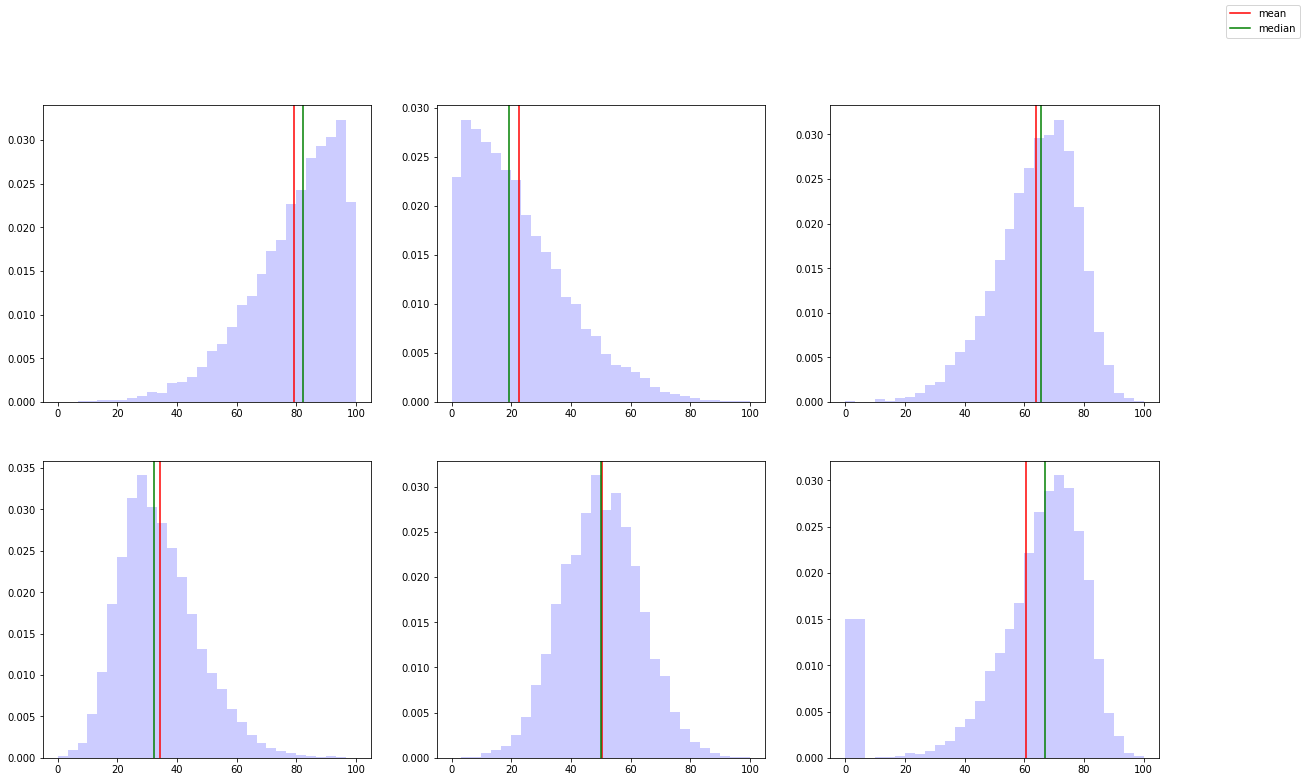

In [101]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

def generate_skwed_data(skewness, maxValue, numValues):
  random = skewnorm.rvs(a = skewness, loc = maxValue, size = numValues) #Skewnorm function
  random = random - min(random) #Shift the set so the minimum value is equal to zero.
  random = random / max(random) #Standadize all the vlues between 0 and 1.
  random = random * maxValue #Multiply the standardized values by the maximum value.
  return random

numValues = 10000
maxValue = 100

fig, ax = plt.subplots(2, 3, figsize =(20, 12))
for i, skewness in enumerate([-100, 100, -3, 3, 0]): #Negative values are left skewed, positive values are right skewed.

  random = generate_skwed_data(skewness,  maxValue, numValues) 

  ax[i // 3, i % 3].hist(random, 30, density = True, color = 'blue', alpha = 0.2)
  ax[i // 3, i % 3].axvline(random.mean(), color='r')
  ax[i // 3, i % 3].axvline(np.median(random), color='g')

random = generate_skwed_data(-3,  maxValue, numValues)
# add some outliers to data
random[0:500] = 0
random[501:1000] = 5

ax[1, 2].hist(random, 30, density = True, color = 'blue', alpha = 0.2)
ax[1, 2].axvline(random.mean(), color='r', label='mean')
ax[1, 2].axvline(np.median(random), color='g', label='median')
fig.legend()
fig.show()

Actually, median even tells us more about our data.  Let's look at this hypothetical example, where we look at 10 homes and we know that the median sales price is \$1 million. Then, we know that five homes sold for \$1 million or more, and five homes sold for less than \$1 million. On the other hand, if we are told that the average sales price is \$1 million, then, it's not really clear what that means.

If the average is \$1 million, then, we know that the sum of the 10 sales prices is \$10 million. But we know nothing about individual prices. Let's assume that one house sold for \$8 million. Then, we know that the total sales prices for the other nine houses must be \$2 million. The average sales price of the other 9 homes is those \$2 million divided by 9, and that's about \$200,000. So, if we think that the average sales price of \$1 million means that most houses sold for roughly \$1 million, then we are very wrong in this case.

Conclusion

Mean can be used for normal distribution.
Mean is not robus to skewed distribution and outliers.
Median is more robust and can be used even for skewed distribution.
Finding median for very large datasets is harder than finding mean.